In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from mpl_toolkits import mplot3d
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.datasets import make_circles

In [3]:
x, y= make_circles(100, factor=.1, noise=.1)

In [4]:
x

array([[ 8.19265436e-02,  1.74151302e-01],
       [-5.65745812e-01,  7.89982200e-01],
       [ 2.62339486e-02, -7.81950508e-02],
       [ 7.58268135e-02,  7.98564148e-02],
       [-2.26521581e-01,  7.78052409e-01],
       [ 1.00148622e+00,  2.91621254e-01],
       [-1.07790848e+00,  1.00743022e-01],
       [ 8.74436800e-01,  6.43170571e-01],
       [ 6.83881774e-01, -7.42326135e-01],
       [ 9.08137671e-01, -4.88117731e-01],
       [ 2.17781224e-01,  7.10438618e-02],
       [ 3.11996269e-01,  8.51997068e-01],
       [ 3.30037830e-02,  8.37029606e-02],
       [ 1.70805677e-01,  1.92458120e-01],
       [ 1.11479389e-02,  7.38795051e-02],
       [ 7.77650171e-01,  3.94664473e-01],
       [ 2.93789851e-02, -7.32766946e-02],
       [-2.19471682e-01, -6.68745843e-02],
       [ 1.36391615e-02, -9.41558810e-02],
       [ 8.33646168e-02,  6.27341601e-02],
       [-3.83851755e-02,  1.83182586e-01],
       [-1.30316182e-02, -2.85930678e-01],
       [ 1.54655599e-01,  1.05459130e+00],
       [ 6.

In [5]:
y

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

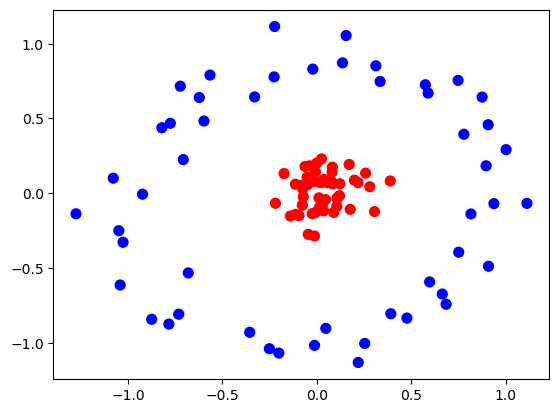

In [6]:
plt.scatter(x[:,0], x[:,1], c=y, s=50, cmap='bwr')

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [8]:
classifier = SVC(kernel="linear")

In [9]:
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [10]:
y_pred = classifier.predict(x_test)

In [11]:
# predicted value
y_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [12]:
# original value
y_test

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0],
      dtype=int64)

In [13]:
accuracy_score(y_test, y_pred)

0.5

In [14]:
classifier_2 = SVC(kernel="rbf")

In [15]:
classifier_2.fit(x_train, y_train)

SVC()

In [16]:
y_pred_2 = classifier_2.predict(x_test)

In [17]:
accuracy_score(y_test, y_pred_2)

1.0

In [18]:
classifier_3 = SVC(kernel="poly")

In [19]:
classifier_3.fit(x_train, y_train)

SVC(kernel='poly')

In [20]:
y_pred_3 = classifier_3.predict(x_test)

In [21]:
accuracy_score(y_test, y_pred_3)

0.6

In [22]:
classifier_4 = SVC(kernel="poly", degree=2)

In [23]:
classifier_4.fit(x_train, y_train)

SVC(degree=2, kernel='poly')

In [24]:
y_pred_4 = classifier_4.predict(x_test)

In [25]:
accuracy_score(y_test, y_pred_4)

1.0

### Decision Boundary == Hyperplane

In [26]:
zero_one_colourmap = ListedColormap(('blue', 'red'))

def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    
    
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\Rishav\AppData\Local\Temp\ipykernel_19376\2117795055.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


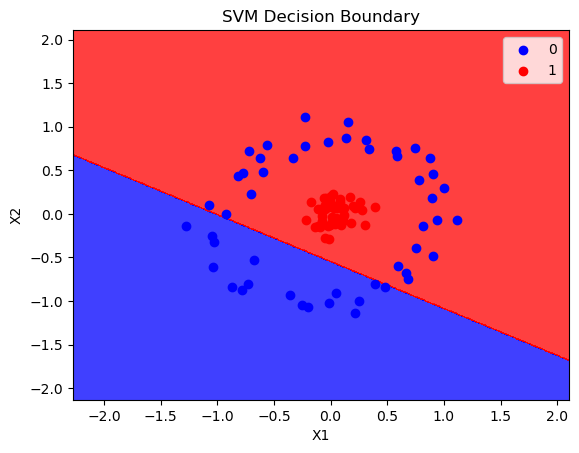

In [27]:
plot_decision_boundary(x, y, classifier)

C:\Users\Rishav\AppData\Local\Temp\ipykernel_19376\2117795055.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


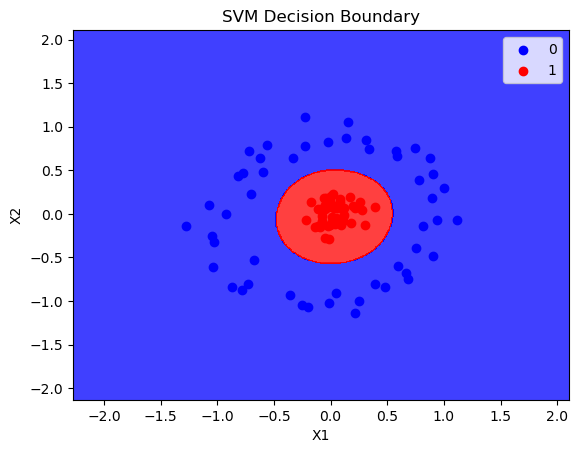

In [28]:
plot_decision_boundary(x, y, classifier_2)

C:\Users\Rishav\AppData\Local\Temp\ipykernel_19376\2117795055.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


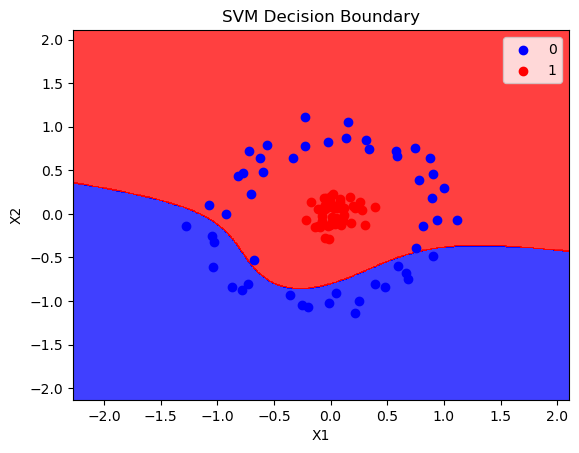

In [29]:
plot_decision_boundary(x, y, classifier_3)

C:\Users\Rishav\AppData\Local\Temp\ipykernel_19376\2117795055.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


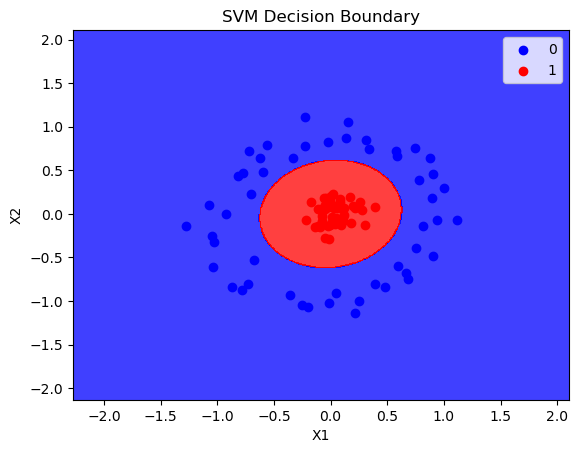

In [30]:
plot_decision_boundary(x, y, classifier_4)

In [31]:
def plot_3d_plot(x, y):
    r = np.exp(-(x**2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(x[:, 0], x[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('x1')
    ax.set_xlabel('x2')
    ax.set_xlabel('y')
    return ax

<Axes3D: xlabel='y'>

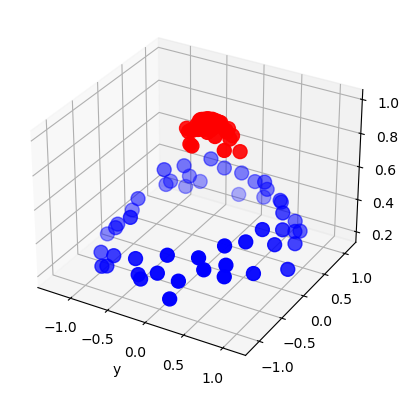

In [32]:
plot_3d_plot(x, y)

### Advanatge:


1.it is effective in high - dimesnsion, it is effective for the non linear seprable data, will you logistic regression or svm for your data classifcaiotn?, logistic regssion it is just for the linear seprable data.

2. robust for the overfitting(genralize)

3. it is roubst for the outlier

4. versatile kernels

### disadvantage
1. computational complex
2. memory intensive
3. parameter sentisitive(c)
in svr by epslon